In [1]:
## Demarrage du projet ##
1+1 #Ca porte chance

2

In [2]:
from Data import DataLoader
from Data import RadarDataSet
from PreProcessing.domaines.passage_freq import get_signal_frequentiel
from Models.PolynomialRegressor import PolynomialRegressor
from Models.BasicNNModel import BasicNNModel
from Models.BasicCNNModel import BasicCNNModel
from Models.BasicAutoEncoder import BasicAutoEncoder
from PreProcessing.utils import data_to_complex
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données

In [7]:
data_loader = DataLoader.DataLoader()
data, labels = data_loader.load_data()

TypeError: __init__() missing 2 required positional arguments: 'datapath' and 'labelpath'

In [8]:
## Chargement des données
data, labels = data_loader.load_data()

radar_dataset = RadarDataSet.RadarDataSet(data,labels,0.4, StandardScaler()) #0.2 is the test size ( 80% train data, 20% test data)
radar_dataset.add_frequential_data()
radar_dataset.y_test.shape

NameError: name 'data_loader' is not defined

# Chargement de différents modèles

In [6]:
basicCNNModel = BasicCNNModel()
basicCNNModel.load("CNN8_bcross_b50_e30_sigmoid_adam")

docuCNNModel= DocuCNNModel()
docuCNNModel.load("CNN80_bcross_b50_e30_sigmoid_adam")

basicAutoEncoder = BasicAutoEncoder()
basicAutoEncoder.load("basicAutoEncoder")
X_test_encoded = basicAutoEncoder.encode(radar_dataset.X_test).squeeze()

405/405 [==============================] - 1s 3ms/step


# Prediction des données de test + évaluation

D:\anaconda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


405/405 [==============================] - 9s 23ms/step
LES METRIQUES SUIVANTES SONT CALCULEES APRES AVOIR TRANSFORMER LES DONNEES DE SORTIES EN SORTIES BINAIRE AVEC UN SEUIL DE 0.8
Mean square error: 0.0020411295273173725
Root Mean square error: 0.04517886150975224
R2 Score : 0.9296067690487803
Accuracy 0.9708136529721059


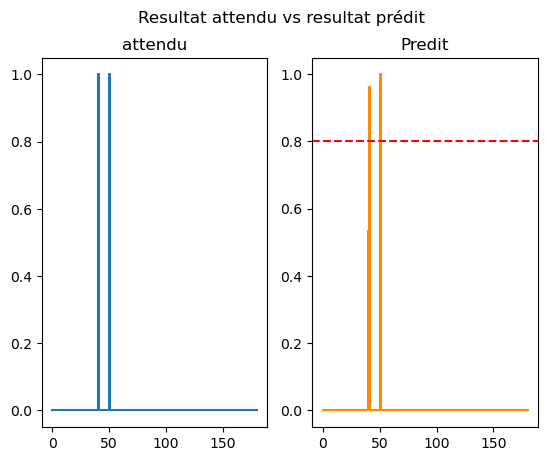

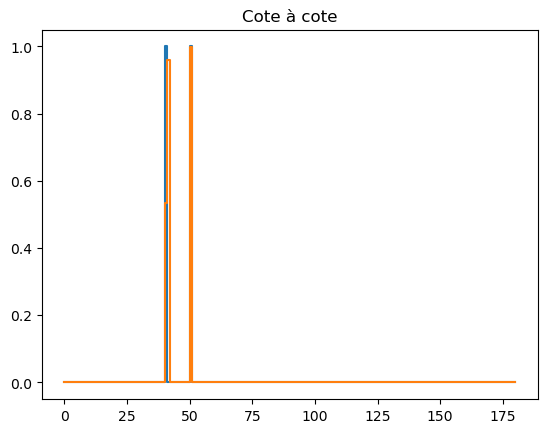

In [8]:
basicCNNModel.evaluate(radar_dataset.X_test,radar_dataset.y_test, threshold = 0.8) #tester differentes valeur de threshold courbe

#POLYNOMIAL REGRESSION

polynomialRegressor = PolynomialRegressor()
polynomialRegressor.train(radar_dataset.X_train,radar_dataset.y_train)
polynomialRegressor.evaluate(radar_dataset.X_test,radar_dataset.y_test)
